In [600]:
import numpy as np
import pandas as pd

In [601]:
class Perceptron:
    def __init__(self, n_inputs):
        self.n_inputs = n_inputs
        self.w = np.ones(shape=(n_inputs))
        self.b = 0
        
        
        
    def fit(self, x, y_true):
        self.x = x
        self.row = x.shape[0]
        self.y_true = y_true
        return self.batch_gradient_descent()
        
        
    def feedforward(self):
        weighted_sum = np.dot(self.w, self.x.T) + self.b
        output = self.activation(weighted_sum)
        return output
    
    def activation(self, x):
        return 1 / (1 + np.exp(-x))
    
    
    def logloss(self):
        epsilon = 1e-15
        y_predicted_new = [max(i, epsilon) for i in self.feedforward()]
        y_predicted_new = [min(i, 1 - epsilon) for i in y_predicted_new]
        y_predicted_new = np.array(y_predicted_new)
        loss = -np.mean(self.y_true*np.log(y_predicted_new) + (1 - self.y_true)*np.log(1 - y_predicted_new))
        return loss
    
    
    def batch_gradient_descent(self):
        epochs_list = []
        loss_list = []
        for i in range(10700):
            y_pred = self.feedforward()
            loss = self.logloss()
            learning_rate = 0.01

            w_derivative = (1/self.row)*((self.x.T.dot(y_pred - self.y_true)))
            b_derivative = np.mean((y_pred - self.y_true))

            self.w = self.w -  learning_rate*w_derivative
            self.b = self.b - learning_rate*b_derivative

            if i%10 == 0:
                print(f"epoch: {i} w: {self.w} loss:{loss} biase: {self.b}")
                epochs_list.append(i)
                loss_list.append(loss)
            
        return self.w, self.b, epochs_list, loss_list
    
    def predict(self, x):
        weighted_sum = np.dot(self.w, x.T) + self.b
        return self.activation(weighted_sum)
        
        

In [602]:
df = pd.read_csv('../../../datasets/insurance.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [603]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], 
                                                    df['bought_insurance'], train_size=0.8, random_state=40)

X_train_standardized = X_train.copy()
X_train_standardized['age'] = X_train_standardized['age'] / 100

X_test_standardized = X_test.copy()
X_test_standardized['age'] = X_test_standardized['age'] / 100

In [604]:
X_test_standardized

,age,affordibility
2,0.47,1
16,0.25,0
19,0.18,1
14,0.49,1
15,0.55,1
13,0.29,0


In [605]:
y_test

2     1
16    1
19    0
14    1
15    1
13    0
Name: bought_insurance, dtype: int64

In [606]:
perceptron = Perceptron(2)

In [607]:
data = perceptron.fit(X_train_standardized, y_train)

epoch: 0 w: age              0.999360
affordibility    0.998607
dtype: float64 loss:0.7532534139325726 biase: -0.002823560405908901
epoch: 10 w: age              0.993115
affordibility    0.984945
dtype: float64 loss:0.7432009469271261 biase: -0.030667928755707802
epoch: 20 w: age              0.987152
affordibility    0.971761
dtype: float64 loss:0.7337012767127539 biase: -0.057805686094162555
epoch: 30 w: age              0.981469
affordibility    0.959052
dtype: float64 loss:0.7247333442730187 biase: -0.084244422693325
epoch: 40 w: age              0.976063
affordibility    0.946815
dtype: float64 loss:0.7162757153747514 biase: -0.10999275072919366
epoch: 50 w: age              0.970929
affordibility    0.935045
dtype: float64 loss:0.708306729751574 biase: -0.13506022832290376
epoch: 60 w: age              0.966064
affordibility    0.923738
dtype: float64 loss:0.7008046420531506 biase: -0.15945728035468748
epoch: 70 w: age              0.961463
affordibility    0.912887
dtype: float

epoch: 650 w: age              0.972651
affordibility    0.769303
dtype: float64 loss:0.5842970156436157 biase: -0.8704330912679875
epoch: 660 w: age              0.975273
affordibility    0.770971
dtype: float64 loss:0.5838661493769091 biase: -0.8762103428576007
epoch: 670 w: age              0.977928
affordibility    0.772689
dtype: float64 loss:0.5834415894638942 biase: -0.8819036038029209
epoch: 680 w: age              0.980614
affordibility    0.774452
dtype: float64 loss:0.5830229272749992 biase: -0.8875159820983106
epoch: 690 w: age              0.983329
affordibility    0.776260
dtype: float64 loss:0.5826097858895253 biase: -0.8930504625670642
epoch: 700 w: age              0.986073
affordibility    0.778110
dtype: float64 loss:0.5822018176169107 biase: -0.8985099115890288
epoch: 710 w: age              0.988845
affordibility    0.780000
dtype: float64 loss:0.581798701708747 biase: -0.903897081667221
epoch: 720 w: age              0.991643
affordibility    0.781928
dtype: float

dtype: float64 loss:0.55984152583241 biase: -1.1766585310704119
epoch: 1380 w: age              1.204115
affordibility    0.938096
dtype: float64 loss:0.5595471217780204 biase: -1.1801535667905325
epoch: 1390 w: age              1.207512
affordibility    0.940477
dtype: float64 loss:0.5592535363507201 biase: -1.183638613671555
epoch: 1400 w: age              1.210910
affordibility    0.942853
dtype: float64 loss:0.5589607637421784 biase: -1.187113848550985
epoch: 1410 w: age              1.214311
affordibility    0.945223
dtype: float64 loss:0.5586687982607388 biase: -1.1905794418673956
epoch: 1420 w: age              1.217712
affordibility    0.947588
dtype: float64 loss:0.5583776343246986 biase: -1.1940355579183222
epoch: 1430 w: age              1.221116
affordibility    0.949948
dtype: float64 loss:0.5580872664561064 biase: -1.1974823551076108
epoch: 1440 w: age              1.224520
affordibility    0.952302
dtype: float64 loss:0.5577976892750311 biase: -1.2009199861826592
epoch: 

epoch: 2230 w: age              1.495382
affordibility    1.118820
dtype: float64 loss:0.5370567876076445 biase: -1.4508899522990393
epoch: 2240 w: age              1.498815
affordibility    1.120684
dtype: float64 loss:0.5368174716341287 biase: -1.453834051472685
epoch: 2250 w: age              1.502248
affordibility    1.122542
dtype: float64 loss:0.5365786557304597 biase: -1.4567734513974655
epoch: 2260 w: age              1.505680
affordibility    1.124395
dtype: float64 loss:0.536340337349677 biase: -1.4597081717068996
epoch: 2270 w: age              1.509113
affordibility    1.126242
dtype: float64 loss:0.5361025139630083 biase: -1.4626382317914821
epoch: 2280 w: age              1.512545
affordibility    1.128083
dtype: float64 loss:0.5358651830597193 biase: -1.46556365080619
epoch: 2290 w: age              1.515977
affordibility    1.129919
dtype: float64 loss:0.535628342146967 biase: -1.4684844476776946
epoch: 2300 w: age              1.519409
affordibility    1.131749
dtype: 

epoch: 2910 w: age              1.728213
affordibility    1.233540
dtype: float64 loss:0.5218082217590557 biase: -1.641224747646716
epoch: 2920 w: age              1.731625
affordibility    1.235059
dtype: float64 loss:0.5215979122931457 biase: -1.6438858478078504
epoch: 2930 w: age              1.735036
affordibility    1.236574
dtype: float64 loss:0.5213879646955598 biase: -1.646543253094408
epoch: 2940 w: age              1.738447
affordibility    1.238084
dtype: float64 loss:0.5211783773771076 biase: -1.6491969752252593
epoch: 2950 w: age              1.741857
affordibility    1.239590
dtype: float64 loss:0.5209691487592157 biase: -1.651847025861812
epoch: 2960 w: age              1.745267
affordibility    1.241091
dtype: float64 loss:0.5207602772738463 biase: -1.6544934166086727
epoch: 2970 w: age              1.748676
affordibility    1.242589
dtype: float64 loss:0.520551761363416 biase: -1.6571361590142912
epoch: 2980 w: age              1.752085
affordibility    1.244081
dtype:

epoch: 3550 w: age              1.945544
affordibility    1.322449
dtype: float64 loss:0.5090179002905404 biase: -1.8045420258573424
epoch: 3560 w: age              1.948921
affordibility    1.323715
dtype: float64 loss:0.5088279417479089 biase: -1.8069882030822646
epoch: 3570 w: age              1.952299
affordibility    1.324976
dtype: float64 loss:0.5086382617523683 biase: -1.8094313391386592
epoch: 3580 w: age              1.955675
affordibility    1.326235
dtype: float64 loss:0.5084488592542546 biase: -1.8118714429215599
epoch: 3590 w: age              1.959051
affordibility    1.327489
dtype: float64 loss:0.5082597332104387 biase: -1.814308523290879
epoch: 3600 w: age              1.962426
affordibility    1.328741
dtype: float64 loss:0.5080708825842781 biase: -1.8167425890715976
epoch: 3610 w: age              1.965801
affordibility    1.329988
dtype: float64 loss:0.50788230634557 biase: -1.8191736490539536
epoch: 3620 w: age              1.969175
affordibility    1.331233
dtype

epoch: 4180 w: age              2.157074
affordibility    1.395783
dtype: float64 loss:0.49755640916400395 biase: -1.9530453217684065
epoch: 4190 w: age              2.16041
affordibility    1.39685
dtype: float64 loss:0.4973821823495404 biase: -1.9553159844291665
epoch: 4200 w: age              2.163744
affordibility    1.397915
dtype: float64 loss:0.49720817900759423 biase: -1.957584104324002
epoch: 4210 w: age              2.167079
affordibility    1.398976
dtype: float64 loss:0.4970343984194903 biase: -1.9598496884468943
epoch: 4220 w: age              2.170412
affordibility    1.400035
dtype: float64 loss:0.4968608398706879 biase: -1.9621127437659833
epoch: 4230 w: age              2.173745
affordibility    1.401091
dtype: float64 loss:0.49668750265075107 biase: -1.9643732772236853
epoch: 4240 w: age              2.177077
affordibility    1.402145
dtype: float64 loss:0.4965143860533192 biase: -1.9666312957368073
epoch: 4250 w: age              2.180408
affordibility    1.403195
dt

epoch: 4920 w: age              2.401855
affordibility    1.467800
dtype: float64 loss:0.485224961071633 biase: -2.1146317541210125
epoch: 4930 w: age              2.405133
affordibility    1.468684
dtype: float64 loss:0.4850655677365631 biase: -2.116731591911922
epoch: 4940 w: age              2.408411
affordibility    1.469567
dtype: float64 loss:0.48490635419516026 biase: -2.118829341555343
epoch: 4950 w: age              2.411687
affordibility    1.470447
dtype: float64 loss:0.48474731996843806 biase: -2.1209250084097984
epoch: 4960 w: age              2.414963
affordibility    1.471325
dtype: float64 loss:0.48458846457988813 biase: -2.123018597815082
epoch: 4970 w: age              2.418238
affordibility    1.472201
dtype: float64 loss:0.48442978755546284 biase: -2.1251101150923386
epoch: 4980 w: age              2.421512
affordibility    1.473075
dtype: float64 loss:0.48427128842355827 biase: -2.1271995655441405
epoch: 4990 w: age              2.424785
affordibility    1.473947
d

epoch: 5560 w: age              2.609954
affordibility    1.520358
dtype: float64 loss:0.4753677513288883 biase: -2.2450235974182053
epoch: 5570 w: age              2.613178
affordibility    1.521118
dtype: float64 loss:0.4752189926926445 biase: -2.24699986343908
epoch: 5580 w: age              2.616400
affordibility    1.521877
dtype: float64 loss:0.4750703875691169 biase: -2.248974349548596
epoch: 5590 w: age              2.619622
affordibility    1.522634
dtype: float64 loss:0.47492193560897866 biase: -2.2509470600503936
epoch: 5600 w: age              2.622843
affordibility    1.523389
dtype: float64 loss:0.47477363646453113 biase: -2.2529179992337163
epoch: 5610 w: age              2.626063
affordibility    1.524142
dtype: float64 loss:0.4746254897896928 biase: -2.2548871713734764
epoch: 5620 w: age              2.629282
affordibility    1.524894
dtype: float64 loss:0.47447749523998906 biase: -2.256854580730308
epoch: 5630 w: age              2.632500
affordibility    1.525644
dty

dtype: float64 loss:0.4665626221181673 biase: -2.3624662931444993
epoch: 6180 w: age              2.808118
affordibility    1.564429
dtype: float64 loss:0.466422642069597 biase: -2.3643413708425824
epoch: 6190 w: age              2.811286
affordibility    1.565092
dtype: float64 loss:0.4662827968658218 biase: -2.3662149067577927
epoch: 6200 w: age              2.814453
affordibility    1.565754
dtype: float64 loss:0.46614308624022677 biase: -2.3680869044124395
epoch: 6210 w: age              2.817618
affordibility    1.566414
dtype: float64 loss:0.4660035099273099 biase: -2.3699573673175154
epoch: 6220 w: age              2.820783
affordibility    1.567073
dtype: float64 loss:0.46586406766267513 biase: -2.3718262989727372
epoch: 6230 w: age              2.823947
affordibility    1.567730
dtype: float64 loss:0.4657247591830261 biase: -2.37369370286659
epoch: 6240 w: age              2.827110
affordibility    1.568386
dtype: float64 loss:0.46558558422615853 biase: -2.3755595824763707
epo

epoch: 6890 w: age              3.030708
affordibility    1.608252
dtype: float64 loss:0.4568138784349685 biase: -2.4937300967768556
epoch: 6900 w: age              3.033809
affordibility    1.608825
dtype: float64 loss:0.45668298578631217 biase: -2.4955025363131105
epoch: 6910 w: age              3.036909
affordibility    1.609398
dtype: float64 loss:0.4565522112724636 biase: -2.4972736611520063
epoch: 6920 w: age              3.040009
affordibility    1.609969
dtype: float64 loss:0.4564215546921797 biase: -2.499043474101522
epoch: 6930 w: age              3.043107
affordibility    1.610539
dtype: float64 loss:0.4562910158449473 biase: -2.50081197796101
epoch: 6940 w: age              3.046205
affordibility    1.611108
dtype: float64 loss:0.4561605945309781 biase: -2.5025791755212254
epoch: 6950 w: age              3.049301
affordibility    1.611676
dtype: float64 loss:0.45603029055120425 biase: -2.5043450695643568
epoch: 6960 w: age              3.052397
affordibility    1.612243
dty

dtype: float64 loss:0.4482961481195892 biase: -2.609704945582402
epoch: 7570 w: age              3.239425
affordibility    1.644880
dtype: float64 loss:0.4481727575705958 biase: -2.611395118533039
epoch: 7580 w: age              3.242462
affordibility    1.645385
dtype: float64 loss:0.4480494731070141 biase: -2.613084147263631
epoch: 7590 w: age              3.245497
affordibility    1.645890
dtype: float64 loss:0.44792629456851485 biase: -2.6147720340680984
epoch: 7600 w: age              3.248531
affordibility    1.646393
dtype: float64 loss:0.44780322179527376 biase: -2.616458781233589
epoch: 7610 w: age              3.251565
affordibility    1.646896
dtype: float64 loss:0.4476802546279688 biase: -2.6181443910404973
epoch: 7620 w: age              3.254597
affordibility    1.647397
dtype: float64 loss:0.4475573929077784 biase: -2.6198288657624915
epoch: 7630 w: age              3.257629
affordibility    1.647898
dtype: float64 loss:0.44743463647637793 biase: -2.6215122076665325
epoc

epoch: 8300 w: age              3.458553
affordibility    1.679570
dtype: float64 loss:0.4394419324077363 biase: -2.7318284783403506
epoch: 8310 w: age              3.461519
affordibility    1.680016
dtype: float64 loss:0.4393259890727556 biase: -2.7334397616794446
epoch: 8320 w: age              3.464484
affordibility    1.680462
dtype: float64 loss:0.4392101411688316 biase: -2.735050053691803
epoch: 8330 w: age              3.467449
affordibility    1.680908
dtype: float64 loss:0.43909438856681926 biase: -2.7366593562286696
epoch: 8340 w: age              3.470412
affordibility    1.681352
dtype: float64 loss:0.43897873113792 biase: -2.738267671136041
epoch: 8350 w: age              3.473374
affordibility    1.681796
dtype: float64 loss:0.4388631687536826 biase: -2.7398750002546897
epoch: 8360 w: age              3.476335
affordibility    1.682239
dtype: float64 loss:0.43874770128599927 biase: -2.7414813454201776
epoch: 8370 w: age              3.479296
affordibility    1.682681
dtyp

epoch: 8930 w: age              3.643539
affordibility    1.706403
dtype: float64 loss:0.4323189466738333 biase: -2.831473778886344
epoch: 8940 w: age              3.646445
affordibility    1.706809
dtype: float64 loss:0.43220877615311043 biase: -2.833026025983739
epoch: 8950 w: age              3.649349
affordibility    1.707215
dtype: float64 loss:0.4320986935455881 biase: -2.8345773888070536
epoch: 8960 w: age              3.652253
affordibility    1.707619
dtype: float64 loss:0.43198869874113033 biase: -2.836127868909256
epoch: 8970 w: age              3.655156
affordibility    1.708024
dtype: float64 loss:0.4318787916298609 biase: -2.8376774678390633
epoch: 8980 w: age              3.658057
affordibility    1.708427
dtype: float64 loss:0.4317689721021631 biase: -2.839226187140956
epoch: 8990 w: age              3.660958
affordibility    1.708830
dtype: float64 loss:0.4316592400486768 biase: -2.840774028355194
epoch: 9000 w: age              3.663858
affordibility    1.709233
dtype

dtype: float64 loss:0.42565059091645685 biase: -2.9260973862242623
epoch: 9560 w: age              3.824720
affordibility    1.730905
dtype: float64 loss:0.4255456719816422 biase: -2.927597591711564
epoch: 9570 w: age              3.827566
affordibility    1.731278
dtype: float64 loss:0.4254408345834152 biase: -2.9290970016715505
epoch: 9580 w: age              3.83041
affordibility    1.73165
dtype: float64 loss:0.4253360786258268 biase: -2.9305956174181813
epoch: 9590 w: age              3.833253
affordibility    1.732021
dtype: float64 loss:0.4252314040131283 biase: -2.9320934402619403
epoch: 9600 w: age              3.836096
affordibility    1.732392
dtype: float64 loss:0.4251268106497701 biase: -2.933590471509844
epoch: 9610 w: age              3.838938
affordibility    1.732763
dtype: float64 loss:0.4250222984404015 biase: -2.935086712465455
epoch: 9620 w: age              3.841778
affordibility    1.733133
dtype: float64 loss:0.42491786728986985 biase: -2.936582164428889
epoch: 

epoch: 10250 w: age              4.018832
affordibility    1.755556
dtype: float64 loss:0.41849809860190756 biase: -3.0292594383920517
epoch: 10260 w: age              4.021613
affordibility    1.755899
dtype: float64 loss:0.41839866579242135 biase: -3.030706949501378
epoch: 10270 w: age              4.024392
affordibility    1.756241
dtype: float64 loss:0.41829930824680744 biase: -3.032153749233042
epoch: 10280 w: age              4.027170
affordibility    1.756583
dtype: float64 loss:0.41820002588142774 biase: -3.033599838682233
epoch: 10290 w: age              4.029948
affordibility    1.756925
dtype: float64 loss:0.4181008186127984 biase: -3.035045218941351
epoch: 10300 w: age              4.032724
affordibility    1.757266
dtype: float64 loss:0.418001686357589 biase: -3.0364898911000093
epoch: 10310 w: age              4.035500
affordibility    1.757607
dtype: float64 loss:0.4179026290326214 biase: -3.037933856245049
epoch: 10320 w: age              4.038275
affordibility    1.757

In [608]:
w , b, epochs_list, loss_list = data

In [609]:
w.values

array([4.14274858, 1.77057753])

In [610]:
b

-3.093566618364058

In [611]:
from matplotlib import pyplot as plt

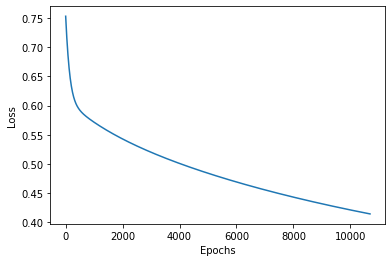

In [612]:
plt.plot(epochs_list, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [613]:
perceptron.predict(X_test_standardized)

array([0.65115108, 0.11325862, 0.3595554 , 0.66972858, 0.72222447,
       0.1309973 ])